In [1]:
%matplotlib notebook

In [2]:
#import dependencies

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Store file path in a variable and read in csv

file = "CleanedYouTube.csv"

yt_df = pd.read_csv(file)

#Print head

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
0,0,WE WANT TO TALK ABOUT OUR MARRIAGE,2kyS6SvSYSE,17.14.11,2017-11-13T17:13:01.000Z,748374
1,1,The Trump Presidency: Last Week Tonight with J...,1ZAPwfrtAFY,17.14.11,2017-11-13T07:30:00.000Z,2418783
2,2,"Racist Superman | Rudy Mancuso, King Bach & Le...",5qpjK5DgCt4,17.14.11,2017-11-12T19:05:24.000Z,3191434
3,3,Nickelback Lyrics: Real or Fake?,puqaWrEC7tY,17.14.11,2017-11-13T11:00:04.000Z,343168
4,4,I Dare You: GOING BALD!?,d380meD0W0M,17.14.11,2017-11-12T18:01:41.000Z,2095731


In [4]:
#trending date vs. views

trending_df = yt_df[["Video Title", "Video ID", "Trending Date", "Total Views"]]

trending_df.head()

,Video Title,Video ID,Trending Date,Total Views
0,WE WANT TO TALK ABOUT OUR MARRIAGE,2kyS6SvSYSE,17.14.11,748374
1,The Trump Presidency: Last Week Tonight with J...,1ZAPwfrtAFY,17.14.11,2418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",5qpjK5DgCt4,17.14.11,3191434
3,Nickelback Lyrics: Real or Fake?,puqaWrEC7tY,17.14.11,343168
4,I Dare You: GOING BALD!?,d380meD0W0M,17.14.11,2095731


In [5]:
#Organize by Video Title using Video ID
videotitle_df = trending_df.sort_values(["Video ID", "Trending Date", "Total Views"], ascending = (False, True, True))

videotitle_df.head()

,Video Title,Video ID,Trending Date,Total Views
16360,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.05.02,154206
16559,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.06.02,199041
144,Dark | Official Trailer [HD] | Netflix,zy0b9e40tK8,17.14.11,378750
32150,kanye west / charlamagne interview,zxwfDlhJIpw,18.02.05,3134765
32352,kanye west / charlamagne interview,zxwfDlhJIpw,18.03.05,5434079


In [6]:
#Find out how many days each video was trending

trending_days = videotitle_df["Video ID"].value_counts()

trending_days

8h--kFui1JA    29
j4KvrAUjn6c    29
r-3iathMo7o    28
WIV3xNz8NoM    28
t4pRQ0jn23Q    28
               ..
nCPIKP_84qs     1
JR4oPuV3CWg     1
JdrdNQfZoqs     1
8hKbIhrb1WU     1
KMTJrFPie6w     1
Name: Video ID, Length: 6351, dtype: int64

In [7]:
trendingSummary_df = pd.DataFrame(trending_days)

#Make the index a column
trendingSummary_df = trendingSummary_df.reset_index()

#Change column names
trendingSummary_df = trendingSummary_df.rename(columns={"Video ID": "Number of Days Trending",
                                                       "index":"Video ID"})



trendingSummary_df.head()

,Video ID,Number of Days Trending
0,8h--kFui1JA,29
1,j4KvrAUjn6c,29
2,r-3iathMo7o,28
3,WIV3xNz8NoM,28
4,t4pRQ0jn23Q,28


In [8]:
len(trendingSummary_df)

6351

In [9]:
#Get rid of all but the last day trending so I only have the total views per video

#Sort by video name, then date

yt_df = yt_df.sort_values(["Video Title", "Trending Date"], ascending=False)

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
16450,16450,"😱 $1,145 iPhone Case!!",r3J784MSRyQ,18.06.02,2018-02-02T23:33:00.000Z,734863
16219,16219,"😱 $1,145 iPhone Case!!",r3J784MSRyQ,18.05.02,2018-02-02T23:33:00.000Z,673040
15991,15991,"😱 $1,145 iPhone Case!!",r3J784MSRyQ,18.04.02,2018-02-02T23:33:00.000Z,408713
3188,3188,🎃 How to make Pumpkin Pie Mistakes,bAfn2duIlN8,17.29.11,2017-11-21T19:39:43.000Z,193223
2944,2944,🎃 How to make Pumpkin Pie Mistakes,bAfn2duIlN8,17.28.11,2017-11-21T19:39:43.000Z,186407


In [10]:
#Remove extra trending dates

yt_df = yt_df.drop_duplicates("Video ID", keep='first')

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
16450,16450,"😱 $1,145 iPhone Case!!",r3J784MSRyQ,18.06.02,2018-02-02T23:33:00.000Z,734863
3188,3188,🎃 How to make Pumpkin Pie Mistakes,bAfn2duIlN8,17.29.11,2017-11-21T19:39:43.000Z,193223
18571,18571,🍫달콤 쌉사름~ 리얼 초콜릿 우유 만들기 Real Chocolate Milk | 한세,CNBGEWRdeIM,18.16.02,2018-02-09T10:36:13.000Z,193794
31872,31872,"🍒 april favs 🍒 (music, clothes, life)",IUsFWiE0d20,18.30.04,2018-04-22T16:00:01.000Z,153238
16773,16773,힐링쿠킹♥ 빙글빙글 회오리젤리 만들기! - Ari Kitchen(아리키친),ghNoCu0QiH4,18.07.02,2018-02-03T01:09:48.000Z,300769


In [11]:
#Check Length...It matches above so we are good!
len(yt_df)

6351

I found that by trying to use video title when I did value counts it got a different number than video id. I decided that using video id would be better incase there were some videos that were different but had the same name or vice versa.

In [12]:
#Merge trendingSumamry_df and yt_df

youTubeMerged_df = pd.merge(trendingSummary_df, yt_df, on="Video ID", how="outer")

youTubeMerged_df.head()


,Video ID,Number of Days Trending,Unnamed: 0,Video Title,Trending Date,Time Published,Total Views
0,8h--kFui1JA,29,38130,Sam Smith - Pray (Official Video) ft. Logic,18.31.05,2018-05-09T17:00:00.000Z,17424422
1,j4KvrAUjn6c,29,38108,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,18.31.05,2018-05-13T18:03:56.000Z,9081270
2,r-3iathMo7o,28,38110,"The ULTIMATE $30,000 Gaming PC Setup",18.31.05,2018-05-13T19:00:25.000Z,6541522
3,WIV3xNz8NoM,28,38132,Cobra Kai Season 2,18.31.05,2018-05-10T17:02:55.000Z,1011030
4,t4pRQ0jn23Q,28,38099,YoungBoy Never Broke Again Goes Sneaker Shoppi...,18.31.05,2018-05-14T14:00:03.000Z,4406761


In [13]:
#Clean it up

ytMaster_df = youTubeMerged_df[["Video Title","Video ID","Number of Days Trending","Time Published","Total Views"]]

ytMaster_df

,Video Title,Video ID,Number of Days Trending,Time Published,Total Views
0,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422
1,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270
2,"The ULTIMATE $30,000 Gaming PC Setup",r-3iathMo7o,28,2018-05-13T19:00:25.000Z,6541522
3,Cobra Kai Season 2,WIV3xNz8NoM,28,2018-05-10T17:02:55.000Z,1011030
4,YoungBoy Never Broke Again Goes Sneaker Shoppi...,t4pRQ0jn23Q,28,2018-05-14T14:00:03.000Z,4406761
...,...,...,...,...,...
6346,Skipping in High School,nCPIKP_84qs,1,2018-01-21T19:56:46.000Z,1931851
6347,4 Life Hacks that Will Ruin Your Life,JR4oPuV3CWg,1,2017-12-03T17:00:01.000Z,239226
6348,Skelly the Skeleton Robot wishing you a Merry ...,JdrdNQfZoqs,1,2017-11-23T16:11:09.000Z,4767
6349,Kim Kardashian Lets Gender of Third Child Slip,8hKbIhrb1WU,1,2017-11-15T14:00:02.000Z,1559003


In [14]:
#Export cleaned data to a new csv
ytMaster_df.to_csv("MasterYouTube.csv", index=True, header=True)

In [15]:
#Create a Bar Graph of Video Titles vs. how many days it was trending

#ytMaster_df.plot(kind='pie',x='Video Title',y='Number of Days Trending')

#Found this was not very practical! 

<IPython.core.display.Javascript object>


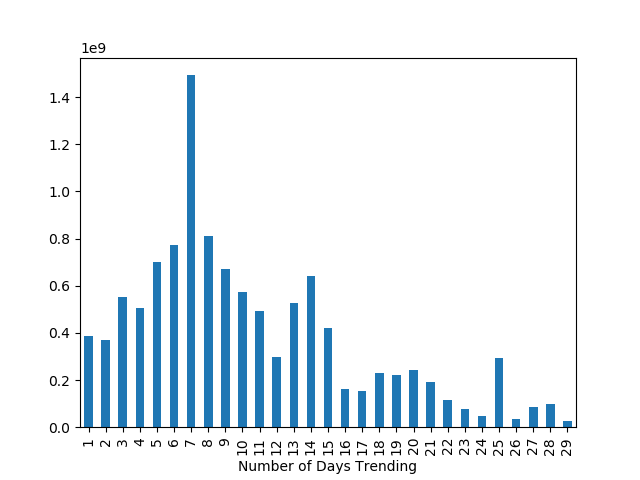

In [21]:
#Create a Bar Graph of how many days it was trending vs. views

#Format Views

#ytMaster_df["Total Views"] = ytMaster_df["Total Views"].map("{:,}")

#ytMaster_df.plot(kind='bar',x='Number of Days Trending',y='Total Views')
#This didn't work so had to change it to groupby



ytMaster_df.groupby('Number of Days Trending')['Total Views'].sum().plot(kind='bar')


In [20]:
#Same thing but show average views for number of days trending
ytMaster_df.groupby("Number of Days Trending")["Total Views"].mean().plot(kind="bar")

plt.show()

What can I infer from this information? 
